In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
dataSome = pd.read_csv("Imputed_data_Ivan.csv")
dataSome

,LLHold,LLLatency,LRHold,LRLatency,RLHold,RLLatency,RRHold,RRLatency,LLHoldStd,LLLatencyStd,...,RHoldSkew,RLatencySkew,LHoldKurt,LLatencyKurt,RHoldKurt,RLatencyKurt,LRHold_Diff,LLRRLatency_Diff,LRRLLatency_Diff,Parkinsons
0,97.654140,406.716242,107.138017,411.718182,100.917949,430.258974,96.400784,365.736471,25.840600,162.606085,...,7.402816,0.446804,0.805770,-0.699806,106.075763,-0.725689,-2.581164,40.979771,-18.540793,0
1,64.452941,390.058823,66.233333,600.433333,68.500000,536.407143,64.341176,394.647059,10.799197,199.162594,...,0.239309,-0.208674,-0.233988,-0.775209,-0.109231,-1.327965,1.156507,-4.588235,64.026190,0
2,143.399528,347.882547,105.325886,313.541489,163.700000,310.799454,106.208750,322.170833,51.115372,101.977747,...,2.804074,-0.115531,0.797792,0.285031,23.790534,-0.215556,47.072756,25.711714,2.742036,0
3,144.314980,528.670445,180.632743,575.478761,156.391710,501.274093,159.277778,493.779630,42.482348,137.542548,...,0.264594,-0.364617,0.595533,-0.409263,0.520341,-0.042387,-18.904747,34.890816,74.204668,0
4,124.285207,300.323155,127.421731,335.508287,125.795492,321.131506,124.941855,332.621036,21.626193,81.749015,...,0.353481,-0.024474,5.019808,-0.741563,5.034476,-0.901017,-1.202048,-32.297880,14.376781,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,74.382119,233.183499,71.242987,249.604979,76.069314,282.845343,75.168615,262.600722,15.847420,68.129255,...,8.103708,0.929794,11.708047,0.692850,103.310649,1.547799,1.842681,-29.417223,-33.240364,0
82,104.445555,284.901879,114.021725,215.023762,102.083155,255.127555,114.708130,271.448199,43.152219,144.554373,...,0.065245,1.584906,196.537883,1.271138,2.400487,3.098033,-10.969995,13.453680,-40.103793,0
83,103.366013,249.626144,141.265306,262.962245,104.287387,247.860360,147.900000,350.363077,24.085334,75.679672,...,-0.368180,-0.033922,5.034818,0.918322,2.103608,-1.017572,-40.157634,-100.736933,15.101885,1
84,147.086450,505.747519,147.248437,456.021354,146.607565,580.315603,136.493676,545.699209,32.984655,139.372280,...,2.553821,0.323904,1.404602,-0.693057,19.824505,-0.903855,3.895622,-39.951690,-124.294249,0


In [3]:
X = dataSome.iloc[:,0:51]
y = dataSome.iloc[:,51]

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [5]:
X_train0, X_test0, y_train0, y_test0 = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 614, 
                                                    shuffle=True,
                                                    stratify=y)

In [10]:
acc_train = np.zeros(10)
acc_test = np.zeros(10)
prec_train = np.zeros(10)
prec_test = np.zeros(10)
rec_train = np.zeros(10)
rec_test = np.zeros(10)
for i in range(1,11):
    pipe = Pipeline([('scale',StandardScaler()),
                    ('RF', RandomForestClassifier(n_estimators = 900,max_depth=i, random_state = 614))])
    pipe.fit(X_train0, y_train0.ravel())
    y_train_pred = pipe.predict(X_train0)
    y_test_pred = pipe.predict(X_test0)
    acc_train[i-1] = accuracy_score(y_train0, y_train_pred)
    acc_test[i-1] = accuracy_score(y_test0, y_test_pred)
    prec_train[i-1] = precision_score(y_train0, y_train_pred)
    prec_test[i-1] = precision_score(y_test0, y_test_pred)
    rec_train[i-1] = recall_score(y_train0, y_train_pred)
    rec_test[i-1] = recall_score(y_test0, y_test_pred)

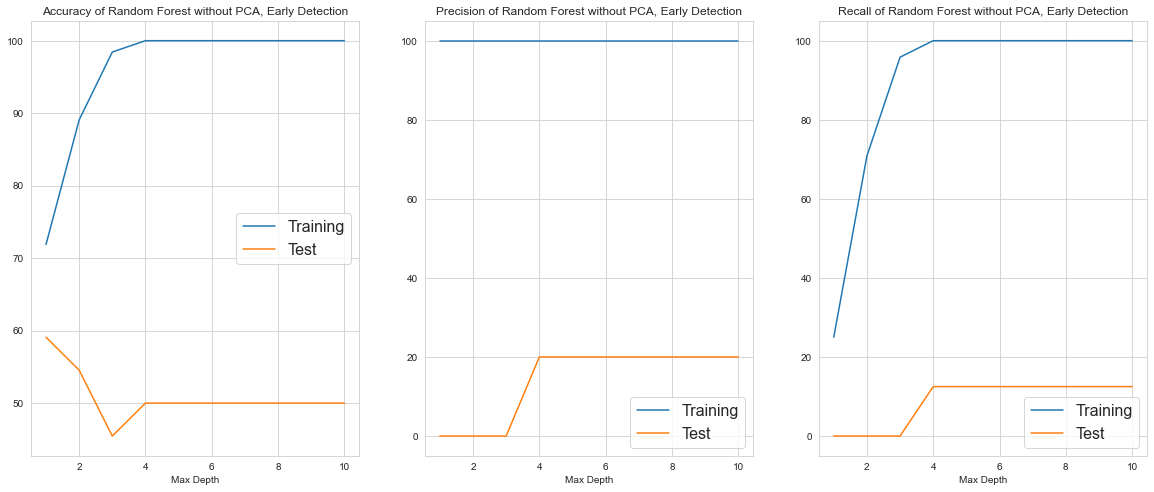

In [11]:
sns.set_style("whitegrid")

fig, (accuracy_graph, precision_graph, recall_graph) = plt.subplots(1,3, figsize = (20,8))

accuracy_graph.plot(range(1,11), 100*acc_train, label = 'Training')
accuracy_graph.plot(range(1,11), 100*acc_test, label = 'Test')
accuracy_graph.set_title('Accuracy of Random Forest without PCA, Early Detection')
accuracy_graph.set_xlabel('Max Depth')
accuracy_graph.legend(fontsize=16)

precision_graph.plot(range(1,11), 100*prec_train, label = 'Training')
precision_graph.plot(range(1,11), 100*prec_test, label = 'Test')
precision_graph.set_title('Precision of Random Forest without PCA, Early Detection')
precision_graph.set_xlabel('Max Depth')
precision_graph.legend(fontsize=16)

recall_graph.plot(range(1,11), 100*rec_train, label = 'Training')
recall_graph.plot(range(1,11), 100*rec_test, label = 'Test')
recall_graph.set_title('Recall of Random Forest without PCA, Early Detection')
recall_graph.set_xlabel('Max Depth')
recall_graph.legend(fontsize=16)


plt.show()

In [12]:
acc_train = np.zeros(10)
acc_test = np.zeros(10)
prec_train = np.zeros(10)
prec_test = np.zeros(10)
rec_train = np.zeros(10)
rec_test = np.zeros(10)
for i in range(1,11):
    pipe = Pipeline([('scale',StandardScaler()),
                    ('PCA', PCA(n_components = 20)),
                    ('RF', RandomForestClassifier(n_estimators = 900,max_depth=i, random_state = 614))])
    pipe.fit(X_train0, y_train0.ravel())
    y_train_pred = pipe.predict(X_train0)
    y_test_pred = pipe.predict(X_test0)
    acc_train[i-1] = accuracy_score(y_train0, y_train_pred)
    acc_test[i-1] = accuracy_score(y_test0, y_test_pred)
    prec_train[i-1] = precision_score(y_train0, y_train_pred)
    prec_test[i-1] = precision_score(y_test0, y_test_pred)
    rec_train[i-1] = recall_score(y_train0, y_train_pred)
    rec_test[i-1] = recall_score(y_test0, y_test_pred)

C:\Users\soumy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


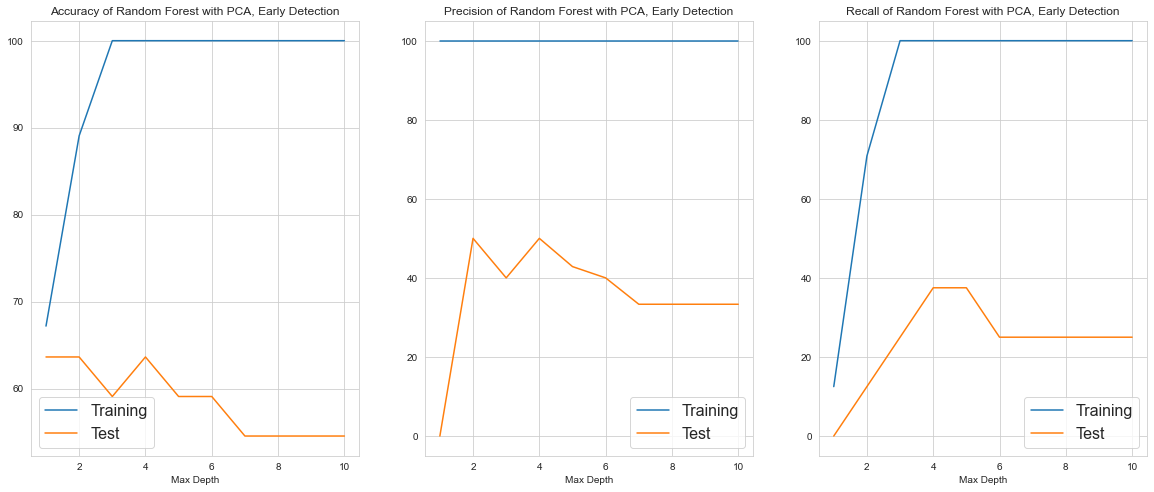

In [13]:
sns.set_style("whitegrid")

fig, (accuracy_graph, precision_graph, recall_graph) = plt.subplots(1,3, figsize = (20,8))

accuracy_graph.plot(range(1,11), 100*acc_train, label = 'Training')
accuracy_graph.plot(range(1,11), 100*acc_test, label = 'Test')
accuracy_graph.set_title('Accuracy of Random Forest with PCA, Early Detection')
accuracy_graph.set_xlabel('Max Depth')
accuracy_graph.legend(fontsize=16)

precision_graph.plot(range(1,11), 100*prec_train, label = 'Training')
precision_graph.plot(range(1,11), 100*prec_test, label = 'Test')
precision_graph.set_title('Precision of Random Forest with PCA, Early Detection')
precision_graph.set_xlabel('Max Depth')
precision_graph.legend(fontsize=16)

recall_graph.plot(range(1,11), 100*rec_train, label = 'Training')
recall_graph.plot(range(1,11), 100*rec_test, label = 'Test')
recall_graph.set_title('Recall of Random Forest with PCA, Early Detection')
recall_graph.set_xlabel('Max Depth')
recall_graph.legend(fontsize=16)


plt.show()

In [14]:
dataAll = pd.read_csv("Imputed_ALLdata_Ivan.csv")

In [15]:
columns = ['LLHold', 'LLLatency','LRHold', 'LRLatency', 'RLHold', 'RLLatency', 'RRHold', 'RRLatency', 
           'LLHoldStd', 'LLLatencyStd','LRHoldStd', 'LRLatencyStd', 'RLHoldStd', 'RLLatencyStd', 'RRHoldStd', 'RRLatencyStd',
           'LLHoldSkew', 'LLLatencySkew','LRHoldSkew', 'LRLatencySkew', 'RLHoldSkew', 'RLLatencySkew', 'RRHoldSkew', 'RRLatencySkew',
           'LLHoldKurt', 'LLLatencyKurt','LRHoldKurt', 'LRLatencyKurt', 'RLHoldKurt', 'RLLatencyKurt', 'RRHoldKurt', 'RRLatencyKurt', 
           'LHold', 'LLatency', 'RHold', 'RLatency', 'LHoldStd', 'LLatencyStd', 'RHoldStd', 'RLatencyStd',
           'LHoldSkew', 'LLatencySkew', 'RHoldSkew', 'RLatencySkew', 'LHoldKurt', 'LLatencyKurt', 'RHoldKurt', 'RLatencyKurt',
           'LRHold_Diff', 'LLRRLatency_Diff', 'LRRLLatency_Diff', 'Parkinsons']
dataAll = dataAll[columns]

In [16]:
X = dataAll.iloc[:,0:51]
y = dataAll.iloc[:,51]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 614, 
                                                    shuffle=True,
                                                    stratify=y)

In [18]:
acc_train = np.zeros(10)
acc_test = np.zeros(10)
prec_train = np.zeros(10)
prec_test = np.zeros(10)
rec_train = np.zeros(10)
rec_test = np.zeros(10)
for i in range(1,11):
    pipe = Pipeline([('scale',StandardScaler()),
                    ('RF', RandomForestClassifier(n_estimators = 200,max_depth=i, random_state = 614))])
    pipe.fit(X_train, y_train.ravel())
    y_train_pred = pipe.predict(X_train)
    y_test_pred = pipe.predict(X_test)
    acc_train[i-1] = accuracy_score(y_train, y_train_pred)
    acc_test[i-1] = accuracy_score(y_test, y_test_pred)
    prec_train[i-1] = precision_score(y_train, y_train_pred)
    prec_test[i-1] = precision_score(y_test, y_test_pred)
    rec_train[i-1] = recall_score(y_train, y_train_pred)
    rec_test[i-1] = recall_score(y_test, y_test_pred)

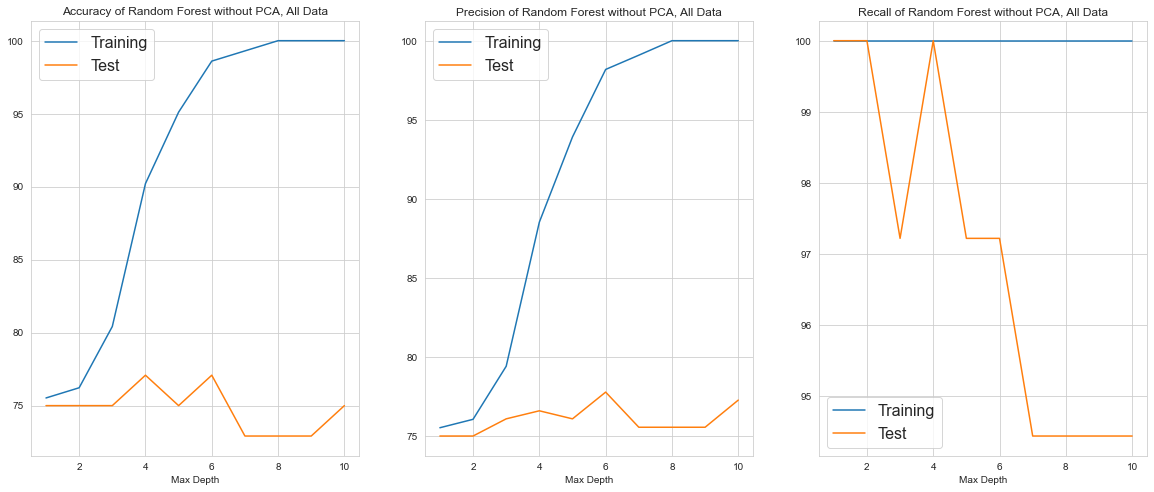

In [19]:
sns.set_style("whitegrid")

fig, (accuracy_graph, precision_graph, recall_graph) = plt.subplots(1,3, figsize = (20,8))

accuracy_graph.plot(range(1,11), 100*acc_train, label = 'Training')
accuracy_graph.plot(range(1,11), 100*acc_test, label = 'Test')
accuracy_graph.set_title('Accuracy of Random Forest without PCA, All Data')
accuracy_graph.set_xlabel('Max Depth')
accuracy_graph.legend(fontsize=16)

precision_graph.plot(range(1,11), 100*prec_train, label = 'Training')
precision_graph.plot(range(1,11), 100*prec_test, label = 'Test')
precision_graph.set_title('Precision of Random Forest without PCA, All Data')
precision_graph.set_xlabel('Max Depth')
precision_graph.legend(fontsize=16)

recall_graph.plot(range(1,11), 100*rec_train, label = 'Training')
recall_graph.plot(range(1,11), 100*rec_test, label = 'Test')
recall_graph.set_title('Recall of Random Forest without PCA, All Data')
recall_graph.set_xlabel('Max Depth')
recall_graph.legend(fontsize=16)


plt.show()

In [20]:
acc_train = np.zeros(10)
acc_test = np.zeros(10)
prec_train = np.zeros(10)
prec_test = np.zeros(10)
rec_train = np.zeros(10)
rec_test = np.zeros(10)
for i in range(1,11):
    pipe = Pipeline([('scale',StandardScaler()),
                    ('PCA', PCA(n_components = 20)),
                    ('RF', RandomForestClassifier(n_estimators = 200,max_depth=i, random_state = 614))])
    pipe.fit(X_train, y_train.ravel())
    y_train_pred = pipe.predict(X_train)
    y_test_pred = pipe.predict(X_test)
    acc_train[i-1] = accuracy_score(y_train, y_train_pred)
    acc_test[i-1] = accuracy_score(y_test, y_test_pred)
    prec_train[i-1] = precision_score(y_train, y_train_pred)
    prec_test[i-1] = precision_score(y_test, y_test_pred)
    rec_train[i-1] = recall_score(y_train, y_train_pred)
    rec_test[i-1] = recall_score(y_test, y_test_pred)

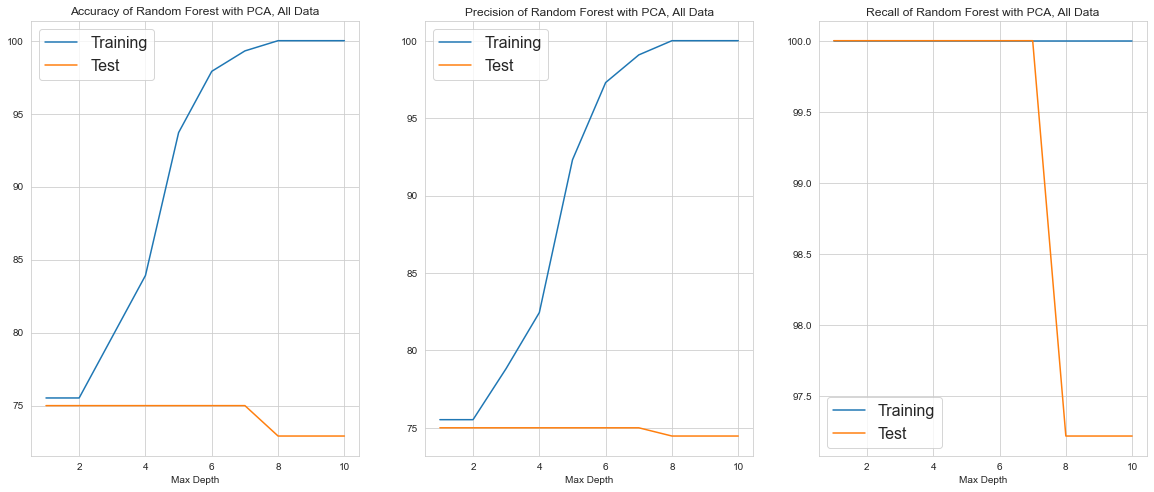

In [21]:
sns.set_style("whitegrid")

fig, (accuracy_graph, precision_graph, recall_graph) = plt.subplots(1,3, figsize = (20,8))

accuracy_graph.plot(range(1,11), 100*acc_train, label = 'Training')
accuracy_graph.plot(range(1,11), 100*acc_test, label = 'Test')
accuracy_graph.set_title('Accuracy of Random Forest with PCA, All Data')
accuracy_graph.set_xlabel('Max Depth')
accuracy_graph.legend(fontsize=16)

precision_graph.plot(range(1,11), 100*prec_train, label = 'Training')
precision_graph.plot(range(1,11), 100*prec_test, label = 'Test')
precision_graph.set_title('Precision of Random Forest with PCA, All Data')
precision_graph.set_xlabel('Max Depth')
precision_graph.legend(fontsize=16)

recall_graph.plot(range(1,11), 100*rec_train, label = 'Training')
recall_graph.plot(range(1,11), 100*rec_test, label = 'Test')
recall_graph.set_title('Recall of Random Forest with PCA, All Data')
recall_graph.set_xlabel('Max Depth')
recall_graph.legend(fontsize=16)


plt.show()